**<font color=#FF149S size=3 face="黑体">第一节 数据清洗及特征处理</font>**

In [6]:
import numpy as np
import pandas as pd

In [8]:
data=pd.read_csv("train.csv")


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
#缺省值观察
data.isnull()#函数返回的是dataframe表中是否有缺失值的总体概述，df中每一个值都为False或者True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
# 查看‘Age’，‘Cabin’，‘Embarked’列的数据的三种方法
#法一
data[['Age','Cabin','Embarked']].head(3)

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S


In [51]:
#法二
data.loc[:,['Age','Cabin','Embarked']].head(3)

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S


In [52]:
#法三
data.iloc[:,[5,10,11]].head(3)

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S


loc：是对行或列标签进行操作
iloc：是对行或列索引进行操作

In [53]:
#返回每一列缺失值统计个数
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
data.isnull().any()#对列表对象迭代对象（True or False）进行一个再统计，如果某一列有一个True则这一列的结果返回True

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [56]:
#将nan置为0
#法一
data.fillna(0)# .fillna()方法从Pandas对象中查找每个缺少的值，并用传入的数值进行填充


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
#法二
data[data['Age']==None]=0
#法三
data[data['Age']==np.nan]=0


In [57]:
#删除缺省值的列
data.dropna(axis=1)#包含缺失值的DataFrame中标识并删除缺失值所在的行，从DataFrame对象调用.dropna()方法即可。注意：如果要删除包含缺失值的列，传递axis = 1参数即可按列而不是按行进行删除。


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [58]:
#单独对Age进行操作的效果
data['Age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

dropna和fillna()有哪些参数，分别如何使用？
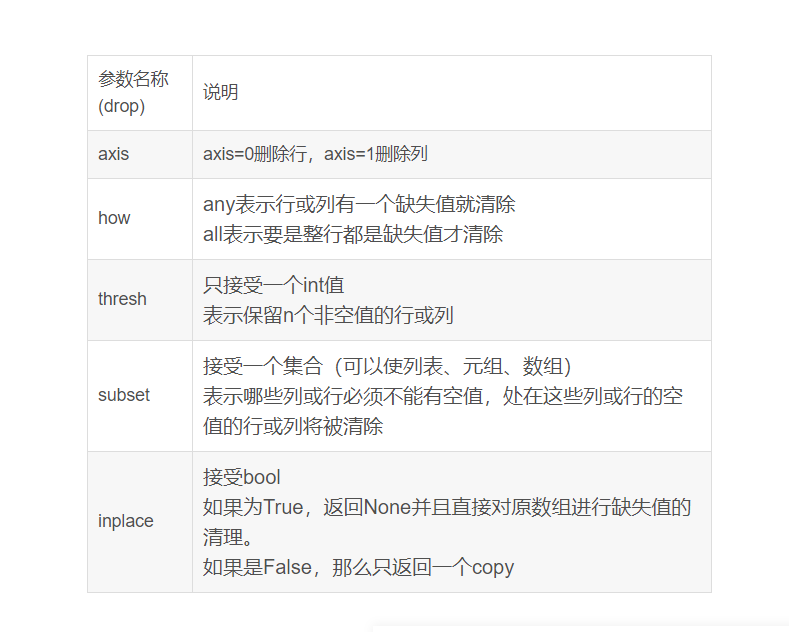
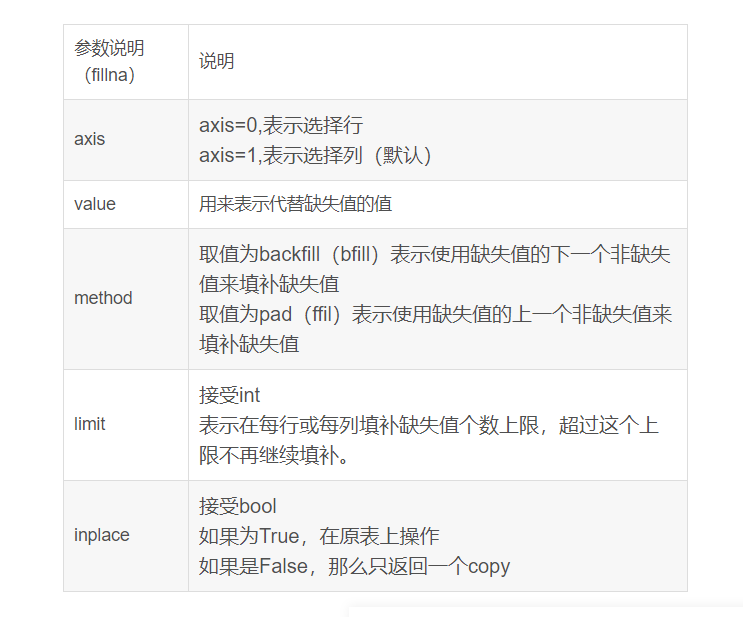

思考：检索空缺值用np.nan,None以及.isnull()哪个更好？

回答:数值列读取数据后，空缺值的数据类型为float64,所以None一般索引不到,比较的时候最好用np.nan。

In [59]:
#查看数据中的重复值
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [62]:
#清除重复元素
data=data.drop_duplicates(keep=False)#keep=false表示会去除所有重复，包括被重复元素本身
data=data.drop_duplicates(keep='first')#表示会保留一个重复元素，即保留被重复元素
data=data.drop_duplicates(subset=['Age','Sex'])#要指定某列可以用subset，默认为none，所有列

In [63]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [20]:
data.to_csv('test_clear.csv')

分箱操作是什么？
分箱操作就是将连续数据转换为分类对应物的过程。⽐如将连续的身⾼数据划分为：矮中⾼

 等间距分隔   
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)   
x   :进行划分的一维数组   
bins：int, sequence of scalars, 或 IntervalIndex分级依据。    
  int：定义equal-width个bin的数量，范围为x。范围x每侧扩展.1％以包括最小和最大值x。   
  标量序列：定义面元边以允许宽度不均匀。没有扩大范围x已经完成了。   
  IntervalIndex：定义要使用的确切bin。请注意，IntervalIndex用于bins必须不重叠  
right：bool, 默认为 True指示是否bins是否包含最右边。如果right == True(默认)，然后bins [1, 2, 3, 4]表示(1,2]，(2,3]，(3,4]。当bins是一个IntervalIndex。   
labels：是否用标记来代替返回的bins    
retbins：bool, 默认为 False是否归还bins。当将bins作为标量提供时很有用。   
precision：int, 默认为 3，存储和显示垃圾箱标签的精度。    
include_lowest:是否包含左端点,默认为false   
duplicates：{default ‘raise’, ‘drop’}, 可选，参数如果bin边不是唯一的，则引发ValueError或丢弃非唯一的。

In [69]:
#将连续变量Age平均分箱成5个年龄段，并分别用类别变量12345表示
data['AgeBand']=pd.cut(data['Age'],5,labels=["1","2","3","4","5"])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [71]:
data.to_csv('test_ave.csv')

In [73]:
#将连续变量Age划分为[0,5) [5,15) [15,30) [30,50) [50,80)五个年龄段，并分别用类别变量12345表示
data['AgeBand']=pd.cut(data['Age'],[0,5,15,30,50,80],labels=["1","2","3","4","5"])
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


In [74]:
data.to_csv('test_cut.csv')

pandas.qcut(x, q, labels=None, retbins=False, precision=3,
duplicates='raise')#基于分位数的离散化函数  
x ：一维数组  
q ：int 或浮点数的类似链表，分位数。10 个代表十分位数，4 个代表四分位数，等等。交替排列分位数，例如 [0, .25, .5, .75, 1.] 代表四分位数   
labels ：数组或 False，默认 None,用作bins的标签。必须与生成的 bin 的长度相同。如果为 False，则仅返回 bin 的整数指示符。如果为真，则引发错    
retbins：布尔值，可选，是否返回 (bins, labels) 或不。如果 bins 作为标量给出，则可能很有用
精度：int，可选，存储和显示 bin 标签的精度   
duplicates{默认'raise'，'drop'}，可选，如果 bin 边缘不是唯一的，则提高 ValueError 或删除非唯一的。   
out:标签为 False，则输出:分类或系列或整数数组,返回类型（Categorical 或 Series）取决于输入：如果输入是 Series，则返回类型类别的 Series，否则是 Categorical。当返回分类数据时，bin 表示为类别。bins:ndarray 的浮点数
仅当retbins为真时返回。

In [77]:
#将连续变量Age按10% 30% 50% 70% 90%五个年龄段，并用分类变量12345表示
data['AgeBand']=pd.qcut(data['Age'],[0,0.1,0.3,0.5,0.7,0.9],labels=["1","2","3","4","5"])
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


In [78]:
data.to_csv("test_qcut.csv")

In [83]:
# 查看文本变量名及种类，Pandas文本数据类型有object和string两种
data["Sex"].value_counts()

male      83
female    64
Name: Sex, dtype: int64

In [93]:
data['Sex'].unique()#以 数组形式（numpy.ndarray）返回列的所有唯一值（特征的所有唯一值）

array(['male', 'female'], dtype=object)

In [92]:
data['Sex'].nunique()#返回的是唯一值的个数

2

In [84]:
data["Cabin"].value_counts()

C23 C25 C27    3
D20            2
F2             2
E67            2
C30            1
C22 C26        1
C32            1
D37            1
E44            1
C92            1
E12            1
B37            1
C85            1
A16            1
C101           1
B41            1
A23            1
E121           1
D11            1
E77            1
B28            1
D7             1
B4             1
C87            1
C123           1
E46            1
G6             1
C103           1
D56            1
A6             1
D33            1
B30            1
C83            1
F G73          1
E31            1
A5             1
D10 D12        1
C110           1
E101           1
B19            1
A7             1
C49            1
C50            1
Name: Cabin, dtype: int64

In [85]:
data["Embarked"].value_counts()

S    108
C     32
Q      6
Name: Embarked, dtype: int64

In [90]:
# 将文本变量Sex， Cabin ，Embarked用数值变量12345表示
#replace()方法语法：str.replace(old, new[, max])字符串中的 old（旧字符串） 替换成 new(新字符串)，如果指定第三个参数max，则替换不超过 max 次。
data["Sex_num"]=data['Sex'].replace(['male','female'],[1,2])
data["Cabin_num"]=data['Cabin'].replace(['male','female'],[1,2])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S,2,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,NaN,2
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C,4,1
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,1


In [13]:
#LabelEncoder是用来对分类型特征值进行编码，即对不连续的数值或文本进行编码。其中包含以下常用方法：
#fit(y) ：fit可看做一本空字典，y可看作要塞到字典中的词。
#fit_transform(y)：相当于先进行fit再进行transform，即把y塞到字典中去以后再进行transform得到索引值。
#inverse_transform(y)：根据索引值y获得原始数据。
#transform(y) ：将y转变成索引值。
#`range()` 函数生成一系列的整数。
#map()是一个 Python 内建函数，它允许你不需要使用循环就可以编写简洁的代码
from sklearn.preprocessing import LabelEncoder
for feat in ['Cabin', 'Ticket']:
    lbl = LabelEncoder()  
    #使用dict()函数将zip对象转换为字典，类似字典形式。zip生成格式类型[('Amo', 18), ('Paul', 19), ('Jason', 20), ('Seven', 21)]
    label_dict = dict(zip(data[feat].unique(), range(data[feat].nunique())))
    data[feat + "_labelEncode"] = data[feat].map(label_dict)#使用map函数，将字典里的键值代替键名
    data[feat + "_labelEncode"] = lbl.fit_transform(data[feat].astype(str))

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_labelEncode,Ticket_labelEncode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,147,523
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81,596
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,147,669
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55,49
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,147,472


pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]    
实现one hot encode的方式   
data ： array-like，Series或DataFrame   
prefix ：string，字符串列表或字符串dict，默认为None，用于追加DataFrame列名的字符串。在DataFrame上调用get_dummies时，传递一个长度等于列数的列表。或者，前缀 可以是将列名称映射到前缀的字典。    
prefix_sep ： string，默认为’_’,如果附加前缀，分隔符/分隔符要使用。或者传递与前缀一样的列表或字典。   
dummy_na ： bool，默认为False 如果忽略False NaN，则添加一列以指示NaN。   
columns ： 类似列表，默认为无   
要编码的DataFrame中的列名称。如果列是None，那么所有与列 对象或类别 D型细胞将被转换。   
sparse ： bool，默认为False   伪编码列是否应由SparseArray（True）或常规NumPy数组（False）支持。   
drop_first ： bool，默认为False ，是否通过删除第一级别

dtype： D型，默认np.uint8，新列的数据类型。只允许一个dtype。


In [16]:
#将文本变量Sex， Cabin， Embarked用one-hot编码表示
for feat in ["Age", "Embarked"]:
    x = pd.get_dummies(data[feat], prefix=feat)
    data = pd.concat([data, x], axis=1)
   
    
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,1


In [19]:
#从纯文本Name特征里提取出Titles的特征(所谓的Titles就是Mr,Miss,Mrs等)
#为了提取Mr,可以看到Mr前面有空格，且从大写字母开始再到小写字母 。所以该正则表达式也是类似：先空了一格，从大写字母A-Z中匹配，再从小写字母a-z中匹配， 到 .（点）这里结束。
#\表示转义，在正则表达式中点（.）表示：匹配除换行符 \n 之外的任何单字符。若要直接使用则需要加上转义符号

data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,0,0,0,0,0,0,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,0,0,1,0,0,Mr


In [ ]:
data.to_csv("test_fin.csv")